# Import all packages

In [28]:
import pandas as pd
import  numpy as np
import seaborn as sns
import sys
import pandas_profiling
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Read dataset into pandas dataframe

In [30]:
data = pd.read_csv('census_18.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8363 entries, 0 to 8362
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8360 non-null   object
 1   Street                         8363 non-null   object
 2   First Name                     8362 non-null   object
 3   Surname                        8362 non-null   object
 4   Age                            8363 non-null   object
 5   Relationship to Head of House  8363 non-null   object
 6   Marital Status                 6387 non-null   object
 7   Gender                         8363 non-null   object
 8   Occupation                     8363 non-null   object
 9   Infirmity                      8363 non-null   object
 10  Religion                       6337 non-null   object
dtypes: object(11)
memory usage: 718.8+ KB


In [31]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### the above  information says that all the columns are objects, but we know for a fact that columns like House Number and Age are supposed to be Numeric. We will keep this in mind when  we begin cleaning the data.

## Next, we will look at the unique values in each column to give us an idea about the data contained in each column

In [3]:
data['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', 'Six', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', 'Seventy Three', '74', '75',
       '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86',
       '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97',
       '98', '99', '100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '110', '111', '112', '113', '114', '115', '116',
       '117', '118', '119', '120', '121', '122', '123', '124', '125',
       '126', '127', '128', '129', '130', '131', '132', '133', '134',
       '135', '136', '137', '138', '139', nan, '73', '140', '

### for the house number variable, we can see that there are some string values of numbers. we will handle all of these individually and change them  to their numeric counter parts.

In [4]:
data['Street'].unique()

array(['Lomond Ville', 'Fisher Street', 'Tannery Land', 'Oak Drive',
       'Dublinbranch Road', 'Allen Road', 'Haymarketcrack Street',
       'Fletcher Viaduct', 'Webster Common', 'November Lane',
       'Snapdragonloom Street', 'Belle Forest', 'Gibson Lane',
       'Unitedbond Street', 'Black Fort', 'Taurus Rapids',
       'Salamander Street', 'Andrews Road', 'Shallowtide Keys',
       '52 Shallowtide Keys', 'Henderson Prairie', 'Patel Estates',
       'Wharf Avenue', 'Bakerthwaite Avenue', 'Wolf Avenue',
       'Thames Lane', 'Glory Lane', 'Brown Centers', 'Aethelstan Cliffs',
       'Moore Street', 'Open Road', 'Quayside Parkway', 'James Course',
       'Lancelothook Lane', 'Ahmed Lane', 'Butterfly Oval',
       'Porter Mountain', 'Duchess Drive', 'Duck Street', 'John Roads',
       'Woodward Mews', 'Campbell Ford', 'Madrid Green', 'Merlin Roads',
       'Saunders Shoal', 'April Shoal', 'Ripon Meadows', 'June Avenue',
       'Cartwright Lane', 'Morris Lodge', 'Stone Bypass', 'Bath 

In [5]:
data['First Name'].unique()

array(['Emma', 'Glenn', 'Sally', 'Glen', 'Janet', 'Jack', 'Leanne',
       'Natasha', 'Natalie', 'Lydia', 'Gregory', 'Marc', 'Beth', 'Louis',
       'Ruth', 'Jayne', 'Heather', 'Thomas', 'Ricky', 'Shaun', 'Craig',
       'Bethany', 'Kathleen', 'Kenneth', 'Alan', 'Ross', 'Dawn', 'Gordon',
       'Edward', 'Joan', 'Max', 'Eric', 'Grace', 'Sylvia', 'Josh',
       'Vanessa', 'Molly', 'Irene', 'Hilary', 'Paula', 'Wayne', 'Mary',
       'Terence', 'Harry', 'Carly', 'Georgina', 'Marilyn', 'Gerald',
       'Maureen', 'Albert', 'Roger', 'Paul', 'Abbie', 'Alice', 'Denise',
       'Stewart', 'Jodie', 'Darren', 'Charles', 'Karl', 'Dorothy',
       'Abdul', 'Leslie', 'Joe', 'Justin', 'Clifford', 'Louise', 'John',
       'Laura', 'Amy', 'Tom', 'Marcus', 'Danielle', 'Jennifer', 'Bryan',
       'Pauline', 'Michael', 'Judith', 'Lynne', 'Reece', 'Rebecca',
       'Colin', 'Jacob', 'Toby', 'Ryan', 'Lindsey', 'Alex', 'Norman',
       'Dale', 'Tracey', 'Jessica', 'Mohammed', 'Diana', 'Jade', 'Amelia',
    

### There is a person whose first name is 'D'. we don't know if this is a mistake or an Initial so we will leave it as is

In [6]:
data['Age'].unique()

array(['50', '54', '21', '22', '48', '83', '47', '12', '49', '8', '70',
       '72', '74', '81', '41', '42', '80', '19', '20', '46', '14', '73',
       '75', '67', '64', '23', '33', '51', '28', '57', '44', '43', '56',
       '39', '55', '31', '82', '32', '29', '18', '36', '40', '9', '13',
       '11', '7', '4', '52', '5', '63', '16', '58', '24', '35', '98',
       '69', '59', '53', '45', '17', '1', '10', '87', '84', '85', '60',
       '76', '25', '79', '78', '88', '68', '37', '30', '66', '62', '38',
       '27', '34', '61', '71', '77', '26', '15', '6', '2', '3', '86',
       '89', '0', '65', '0.5', ' ', '96', '-1', '520', 'twenty', '101',
       '93', '51.19016704', '53.19016704', '99', '97', '60.1841585',
       '65.1841585', '94', '105', '92', '104', '109', '53.62129809',
       '16.5', '90', '66.33414231', '100', '102', '65.4677806',
       '68.4677806', '40.5', '85.56434732', '81.56434732', '103'],
      dtype=object)

### The age variable has multiple float values that will have to be converted to integers. it also has a string 'twenty' which will be converted and a '-1' which I will treat as a missing value. lastly it has blank spaces which i will also treat as missing values

In [7]:
data['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Daughter', 'Son', 'Granddaughter', 'Step-Son',
       'Wife', 'None', 'Partner', 'Lodger', 'Adopted Daughter',
       'Grandson', 'Sibling', 'Cousin', 'Step-Daughter', 'Visitor',
       'Nephew', ' ', 'Neice', 'Adopted Son', 'Adopted Granddaughter',
       'Son-in-law'], dtype=object)

### Relationship to head of house does not seem to have any messy values but it does have blank spaces which will be treated as missing values, and a mispelt version of Niece which will be corrected

In [8]:
data['Marital Status'].unique()

array(['Married', 'Divorced', 'Single', nan, 'Widowed', 'Marrie d',
       'divorced', 'single', ' '], dtype=object)

### Marital status has mispelt variations of 'Divorced', 'Single', and 'Married' which  will all be replaced to make them uniform. it also has blank spaces that will be treated as missing values

In [9]:
data['Gender'].unique()

array(['Female', 'Male', 'M', 'MALE', 'Fem', 'Fem-ale', 'MAL E',
       'Fem ale', 'male', 'Male-', 'fem', ' ', 'Fe-male', 'F', 'FEMALE'],
      dtype=object)

### Gender has multiple variations of Male and Female which will be made uniform during cleaning

In [10]:
data['Occupation'].unique()

array(['Financial planner', 'Civil Service fast streamer',
       'University Student', ..., 'Retired Newspaper journalist',
       'Retired Therapeutic radiographer', 'Retired Lawyer'], dtype=object)

### Occupation has a lot of unique values. but something we notice is that there are a lot of retired occupations which will later be grouped under one 'Retired' category

In [11]:
data['Infirmity'].unique()

array(['None', 'Unknown Infection', 'Mental Disability', 'Deaf',
       'Physical Disability', 'Blind', 'Disabled', ' '], dtype=object)

### Infirmity has a Disabled value which is different from Mental Disability and Physical Disability.  We should consider merging it with Physical Disability because it is a common synonym used to describe physical disability. It also has  blank spaces which will be treated as missing values

In [12]:
data['Religion'].unique()

array(['Catholic', 'None', 'Christian', 'Methodist', nan, 'Muslim',
       'Jewish', 'Sikh', 'Buddist', ' ', 'Cat holic', 'Undecided',
       'Orthodoxy', 'Nope', 'Quaker'], dtype=object)

### Religion has mispellings of Catholic which will be treated. it also has two versions of Irreligious people, which will be made uniform under one category

# Missing values

We will use pandas to get the number of missing values in each variable

In [13]:
data.isnull().sum()

House Number                        3
Street                              0
First Name                          1
Surname                             1
Age                                 0
Relationship to Head of House       0
Marital Status                   1976
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2026
dtype: int64

We can see that there are trace amounts of missing values in House Number and the two name variables, but there are very high amounts in Marital Status and Religion. 

## We will plot a barchat to get a visual representation of the missing values

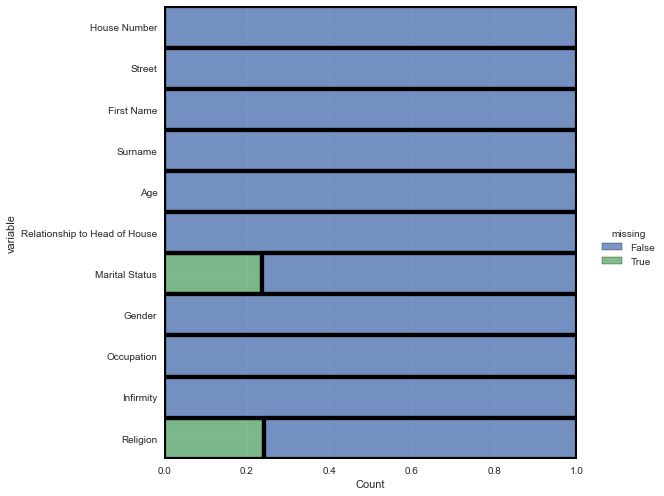

In [14]:
#make the plot
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.2, height = 7
)

We can see from the bar chart that the missing values in Marital Status and Religion are almost the same number. this could mean that there is a relationship between these missing values. 

We can further investigate this by subsetting the data on a group of people who we think should not have a religion or marriage status. We can try taking children below 18 for example, because we know children cannot be married

But in order to perform the above operation, we will have to convert the age variable to an Int type and handle all the inconsistencies in the data

In [15]:
# handle the string in age
data['Age'].replace('twenty', 20, inplace=True)
#handle the negative value in age
data['Age'].replace(-1,np.nan, inplace=True)
#convert age to int type
data['Age'] = np.floor(pd.to_numeric(data['Age'],errors='coerce')).astype('Int64')
#replace missing values with the median age
data['Age'].fillna(data['Age'].median(),inplace=True)

#### Now we can make the plot

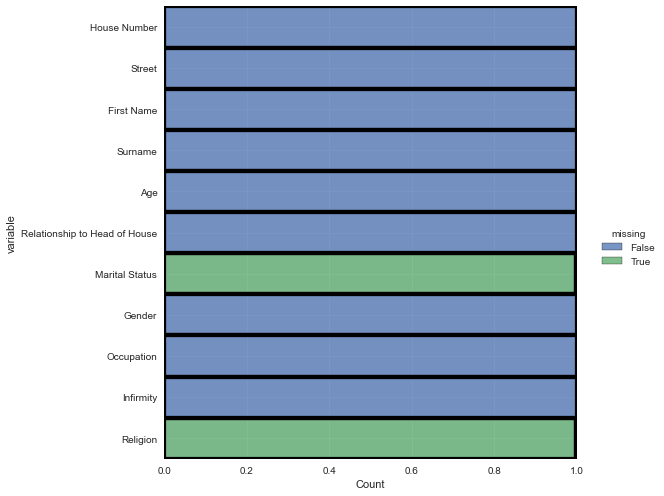

In [16]:
students = data[data['Age'] < 18]
sns.displot(
    data=students.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.2,height =7
)

So we can see that the missing values in Marital Status and Religion are as a result of the children who should not be married in the first place.
So to handle the missing values in Marital Status and Religion, we can consider creating a new category called 'Not Applicable' to represent children who cannot be married or have religions.

## Next, We will be checking if there are any outliers in the age variable

To do this, we will be plotting a box plot of the variable

<AxesSubplot:xlabel='Age'>

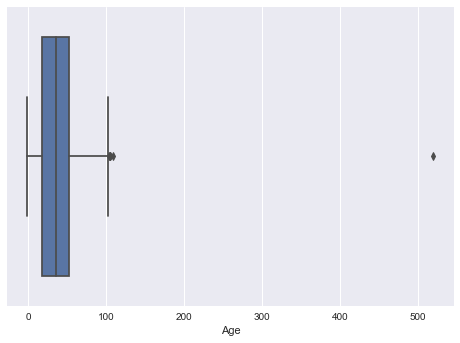

In [17]:
sns.boxplot(x=data['Age'])

From the boxplot we can see that there is a single point that lies well above 100 years of age. This is obviously a lie so we have to investigate this particular row

In [18]:
data[data['Age'] > 300]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2019,51,Shallowtide Keys,Marion,Thompson,520,Head,Single,Female,Unemployed,None,Christian


The data shows us the information of the person who lied about their age. Normally, outliers would be replaced by the highest value in the dataset, but we will treat this particular case as a missing value because it is a case of intentional misinformation, and replace it with the median age

In [19]:
data['Age'].replace(520,data['Age'].median(),inplace=True)

Now we have succesfully handled outliers in the dataset

## Plotting the population pyramid

We will use a population pyramid to see the distribution of the population based on age and gender

But before we plot the pyramid, we will have to handle all missing values and inconsistencies in the Gender variable

In [20]:
data['Gender'].unique()

array(['Female', 'Male', 'M', 'MALE', 'Fem', 'Fem-ale', 'MAL E',
       'Fem ale', 'male', 'Male-', 'fem', ' ', 'Fe-male', 'F', 'FEMALE'],
      dtype=object)

We have to handle the inconsistent spellings of Male and Female so that we have just two categories

In [21]:
#create lists to hold all inconsistent spellings
male_spelling_errors = ['M', 'MALE', 'MAL E','male', 'Male-']
female_spelling_errors = ['Fem', 'Fem-ale', 'Fem ale', 'fem', 'Fe-male','F','FEMALE']
#replace male values
for x in male_spelling_errors:
    data['Gender'].replace(x, 'Male',inplace=True)
#replace female values
for x in female_spelling_errors:
    data['Gender'].replace(x,'Female',inplace=True)
    
data['Gender'].unique()    

array(['Female', 'Male', ' '], dtype=object)

Next we have to replace the blank spaces with the mode

In [22]:
data['Gender'].replace(' ',data['Gender'].mode()[0],inplace=True)
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

We have succesfully handled all inconsistencies in Gender. now we go on to plot the population pyramid

Text(0.5, 1.0, 'Population Pyramid')

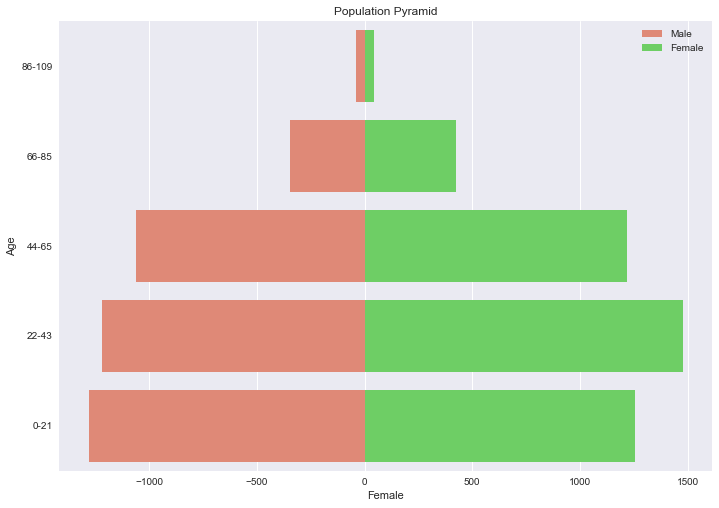

In [26]:
#bind each bin to a variable
young = data[( data['Age'] >=0) & (data['Age'] <=21)]
adult = data[( data['Age'] >=22) & (data['Age'] <=43)]
mature = data[( data['Age'] >=44) & (data['Age'] <=65)]
old = data[( data['Age'] >=66)  & (data['Age'] <=85)]
elderly = data[( data['Age'] >= 86) & (data['Age'] <=109)]
#save the bins in a list
bins = [elderly,old,mature,adult,young]
#create a list called Age group to hold all the bins
age_groups = ['86-109','66-85','44-65','22-43','0-21']
#create lists to hold male and female entries
male = list()
female = list()
#loop through the list of bins and append the ages to male and female lists
for x in bins:
        female.append(len(x[x['Gender'] =='Female'].index))
        male.append(len(x[x['Gender'] =='Male'].index) * -1)
        
#make the dataframe we wil use to plot the population pyramid
pyramid_df = pd.DataFrame({'Age' : age_groups, 'Male': male, 'Female': female})
#plot the population pyramid
dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
pop_pyramid = sns.barplot(x='Male', y='Age', data=pyramid_df, order=age_groups,
color=('#F17E65'), label='Male',ax=ax)
pop_pyramid = sns.barplot(x='Female', y='Age', data=pyramid_df, order=age_groups,
color=('#60E053'), label='Female',ax=ax)
pop_pyramid.legend()
plt.title('Population Pyramid')

The population pyramid shows us that the population is a growing one, from the high frequency of young ages which diminish as the ages get older.